In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
def all_plots_kfold(best_threshold, all_thresholds_results, best_test_accuracy):
    thresholds = [float(k) for k in all_thresholds_results.keys()]
    test_accuracies = [v['test_accuracy'] for v in all_thresholds_results.values()]
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=thresholds, y=test_accuracies, marker="o", label="Test Accuracy")
    plt.axvline(best_threshold, color='red', linestyle='--', label=f"Best Threshold ({best_threshold:.2f})")
    plt.axhline(best_test_accuracy, color='green', linestyle='--', label=f"Best Accuracy ({best_test_accuracy:.4f})")
    plt.title("Threshold vs. Test Accuracy", fontsize=16)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Test Accuracy", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()

    plt.figure(figsize=(14, 8))

    train_info = {}
    val_info = {}
    for i in np.arange(0.05, 0.16, 0.01):
        with open(f'./training_history/history_threshold_{i:.2f}.json', 'r') as f:
            best_history = json.load(f)
        train_info[i] = best_history['train_loss']
        val_info[i] = best_history['val_loss']            
            
    for (k1, v1), (k2, v2) in zip(train_info.items(), val_info.items()):
        train_loss = v1
        val_loss = v2
        plt.plot(train_loss, label=f"Train Loss (Threshold: {k1:.2f})", linestyle='--')
        plt.plot(val_loss, label=f"Val Loss (Threshold: {k1:.2f})", linestyle='-')

    plt.title("Loss Curves Across Thresholds", fontsize=16)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.legend(fontsize=10, loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()

    train_losses = best_history['train_loss']
    val_losses = best_history['val_loss']
    epochs = range(len(train_losses))
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_losses, label="Training Loss", color='blue', linewidth=2)
    plt.plot(epochs, val_losses, label="Validation Loss", color='orange', linewidth=2)
    plt.title(f"Training vs. Validation Loss (Best Threshold: {best_threshold:.2f})", fontsize=16)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title("Loss Curves Across Thresholds", fontsize=16)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()

    train_acc = best_history['train_acc']
    val_acc = best_history['val_acc']
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_acc, label="Training Accuracy", color='green', linewidth=2)
    plt.plot(epochs, val_acc, label="Validation Accuracy", color='purple', linewidth=2)
    plt.title(f"Training vs. Validation Accuracy (Best Threshold: {best_threshold:.2f})", fontsize=16)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("Loss Curves Across Thresholds", fontsize=16)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.show() 

    thresholds = np.array([t for t in thresholds])
    epochs = np.arange(len(train_losses))
    X, Y = np.meshgrid(epochs, thresholds)
    Z = np.array([val_info[threshold] for threshold in thresholds])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='coolwarm')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Thresholds')
    ax.set_zlabel('Loss')
    plt.title("Loss Curves Across Thresholds", fontsize=16)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='coolwarm')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Thresholds')
    ax.set_zlabel('Loss')
    plt.title("Loss Curves Across Thresholds", fontsize=16)
    plt.show()

    grad_x, grad_y = np.gradient(Z)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(X, Y, Z, grad_x, grad_y, np.zeros_like(grad_x), length=0.1, normalize=True)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Thresholds')
    ax.set_zlabel('Loss')
    plt.title("Loss Curves Across Thresholds", fontsize=16)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', shade=True)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Thresholds')
    ax.set_zlabel('Loss')
    plt.title("Loss Curves Across Thresholds", fontsize=16)
    plt.show()

    fig = plt.figure(dpi=100, figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X, Y, Z, c=Z, cmap='viridis', marker='o', s=8)

    ax.set_xlabel(r'$\mathit{Epochs}$', fontsize=14, labelpad=10)
    ax.set_ylabel(r'$\mathit{Thresholds}$', fontsize=14, labelpad=10)
    ax.set_zlabel(r'$\mathit{Loss}$', fontsize=14, labelpad=10)
    plt.title("Loss Across Epochs and Thresholds", fontsize=16, fontweight='bold')
    # cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=10, pad=0.1)
    # cbar.set_label(r'$\mathit{Loss}$ Intensity', fontsize=12)

    # ax.view_init(elev=25, azim=135)
    plt.show()

    epochs, thresholds = np.meshgrid(epochs, thresholds)  # Create a grid
    val_losses = Z

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface
    ax.plot_surface(epochs, thresholds, val_losses, cmap='coolwarm', alpha=0.5, edgecolor='none')

    # Highlight epochs 100-200 (highs & lows)
    mask = (epochs >= 80) & (epochs <= 220)
    ax.scatter(epochs[mask], thresholds[mask], val_losses[mask], color='red', label='High Variability (80-220)', s=10, alpha=1)

    # Highlight epochs beyond 200 (convergence)
    mask2 = epochs > 220
    ax.scatter(epochs[mask2], thresholds[mask2], val_losses[mask2], color='green', label='Convergence (>220)', s=10)

    # Labels & Legends
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Thresholds')
    ax.set_zlabel('Loss')
    ax.set_title('3D Visualization of Loss across Epochs and Thresholds')
    ax.legend()

    # Adjust View Angle for Better Visibility
    # ax.view_init(elev=30, azim=225)  # Adjust angles for better visibility
    plt.savefig("loss_3d_plot_highres.png", dpi=600, bbox_inches='tight')

    plt.show()

In [4]:
import torch

model = "./checkpoints/best_model_threshold_0.11.pt"
model = torch.load(model, map_location=torch.device('cpu'))

state_dict = model['model_state_dict']

for k, v in state_dict.items():
    print(k, v.shape)

conv1.lin_l.weight torch.Size([256, 128])
conv1.lin_l.bias torch.Size([256])
conv1.lin_r.weight torch.Size([256, 128])
bn1.module.weight torch.Size([256])
bn1.module.bias torch.Size([256])
bn1.module.running_mean torch.Size([256])
bn1.module.running_var torch.Size([256])
bn1.module.num_batches_tracked torch.Size([])
conv2.lin_l.weight torch.Size([256, 256])
conv2.lin_l.bias torch.Size([256])
conv2.lin_r.weight torch.Size([256, 256])
bn2.module.weight torch.Size([256])
bn2.module.bias torch.Size([256])
bn2.module.running_mean torch.Size([256])
bn2.module.running_var torch.Size([256])
bn2.module.num_batches_tracked torch.Size([])
mlp.0.weight torch.Size([256, 256])
mlp.0.bias torch.Size([256])
mlp.3.weight torch.Size([13, 256])
mlp.3.bias torch.Size([13])


/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_24163/1358868950.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model, map_location=torch.

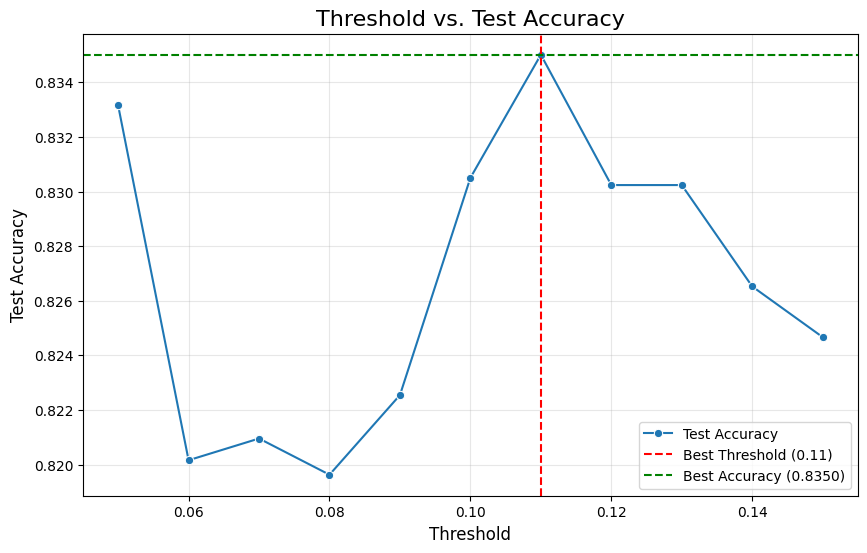

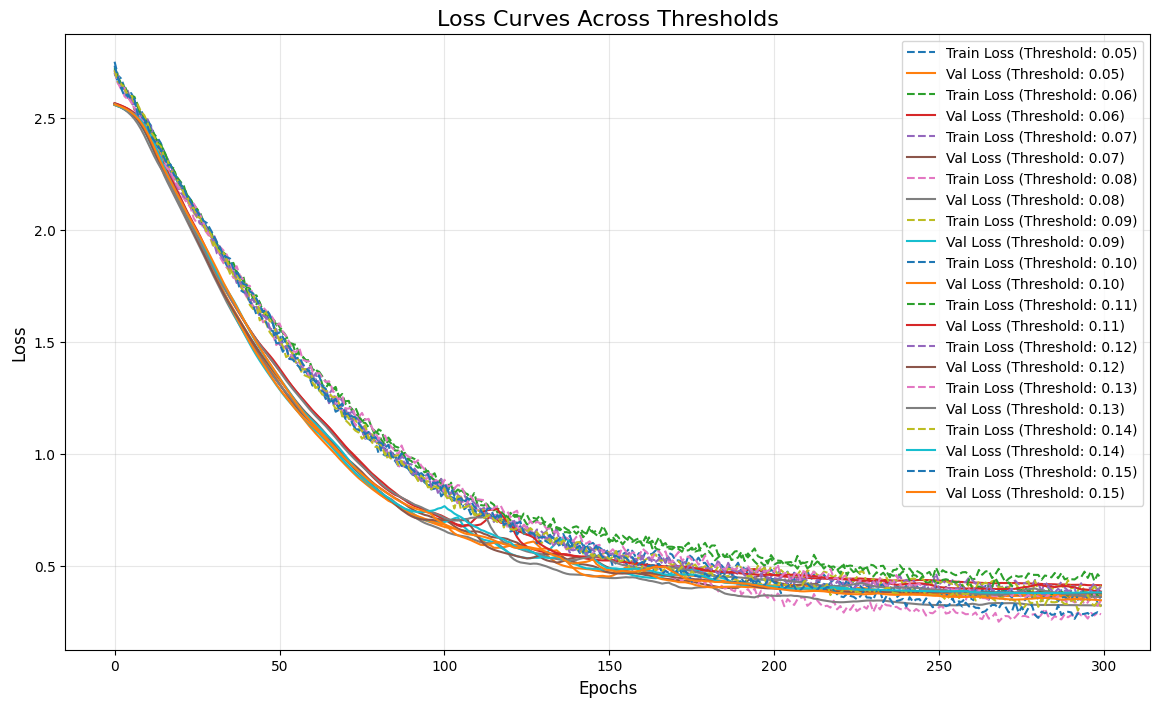

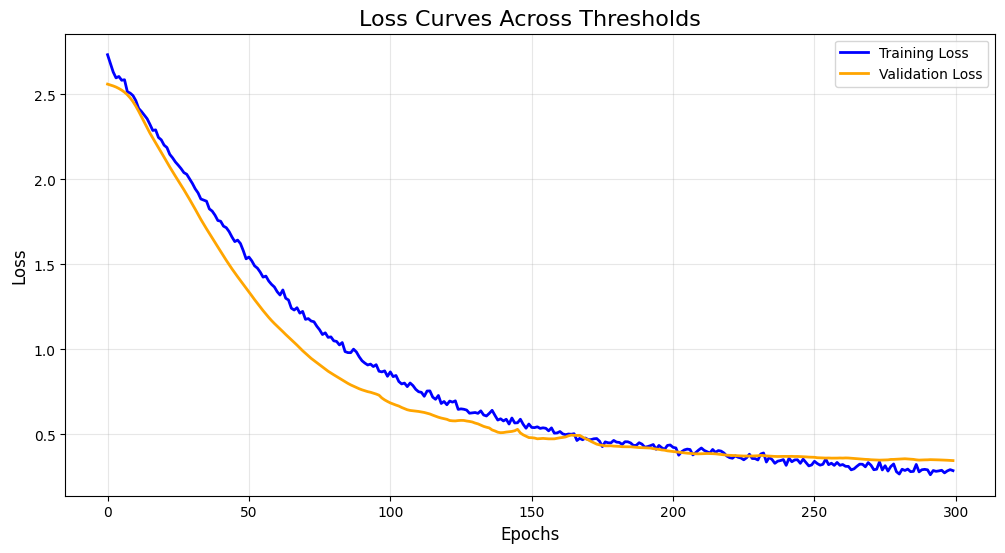

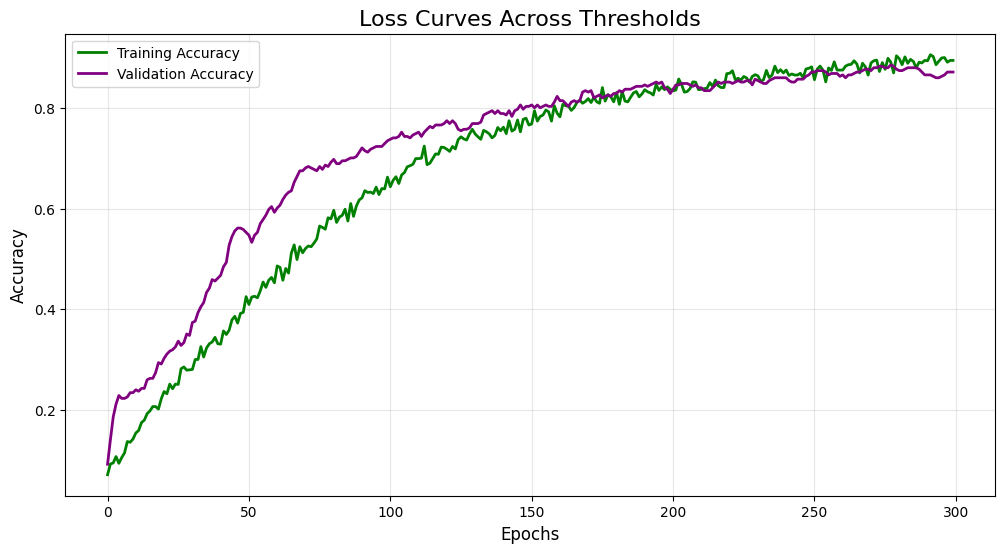

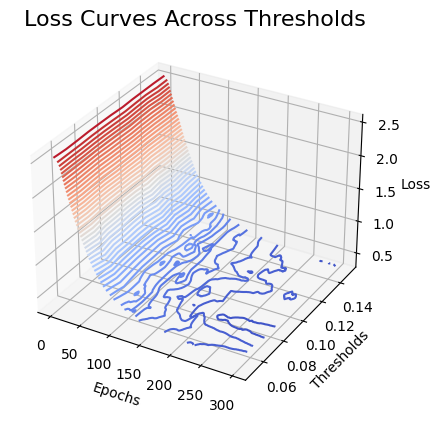

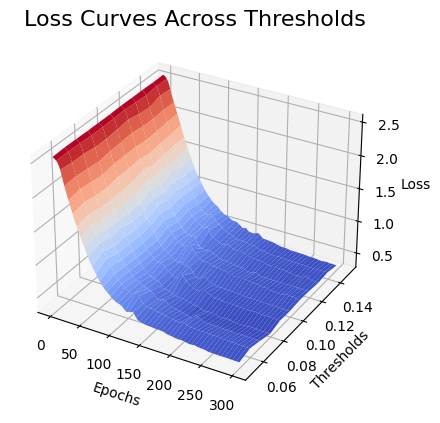

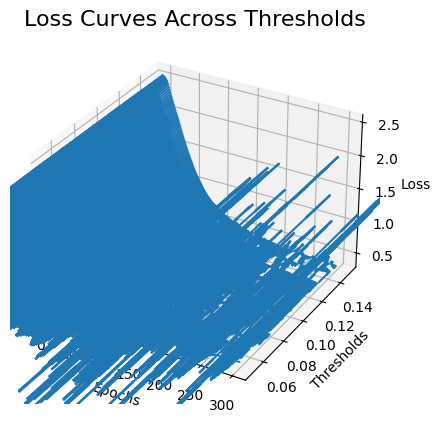

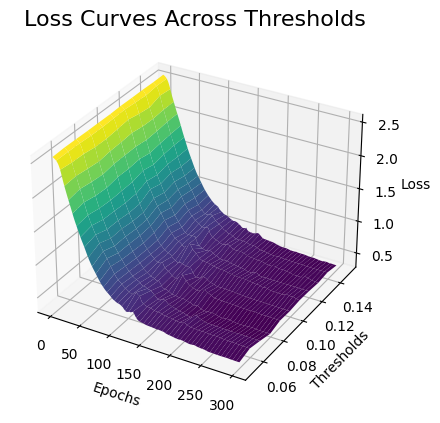

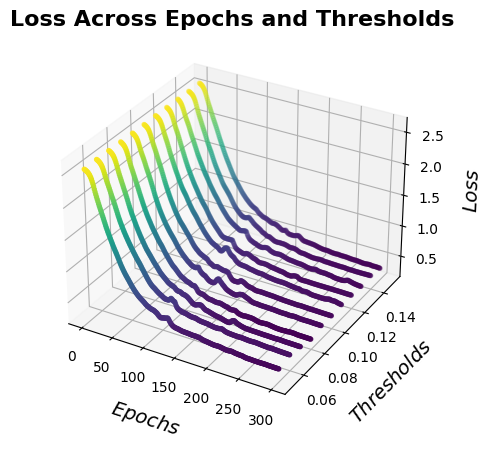

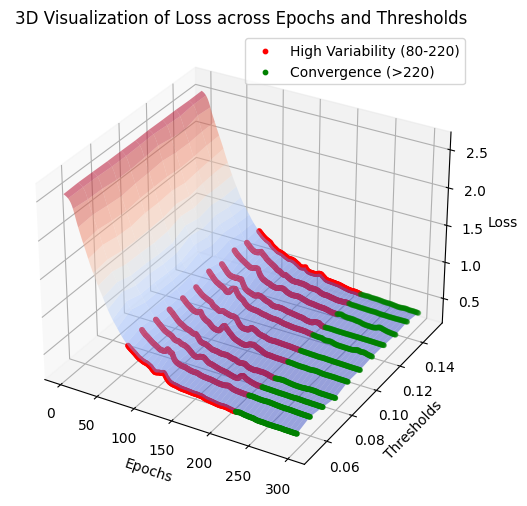

In [5]:
path = "./results/cv_results.json"
with open(path, 'r') as f:
    results = json.load(f)

best_threshold = results['best_threshold']
all_thresholds_results = results['all_thresholds_results']
best_test_accuracy = results['best_avg_test_accuracy']

all_plots_kfold(best_threshold, all_thresholds_results, best_test_accuracy)